# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try: 
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | champerico
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | santiago del estero
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | kesinga
Processing Record 7 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | kaitangata
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | ixtapa
Processing Record 13 of Set 1 | coquimbo
Processing Record 14 of Set 1 | geraldton
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | chuy
Processing Record 17 of Set 1 | hasaki
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | buluang
Processing Record 21 of Set 1 | husavik
Processing Record 22 of Set 1 | antalaha

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,62.62,54,0,23.02,CL,1668533358
1,champerico,14.3000,-91.9167,91.94,72,11,4.03,GT,1668533399
2,carnarvon,-24.8667,113.6333,71.89,67,0,14.34,AU,1668533400
3,santiago del estero,-27.7951,-64.2615,93.31,21,30,14.56,AR,1668533400
4,kodiak,57.7900,-152.4072,40.51,75,40,5.75,US,1668533249


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,62.62,54,0,23.02,CL,1668533358
1,champerico,14.3000,-91.9167,91.94,72,11,4.03,GT,1668533399
2,carnarvon,-24.8667,113.6333,71.89,67,0,14.34,AU,1668533400
3,santiago del estero,-27.7951,-64.2615,93.31,21,30,14.56,AR,1668533400
4,kodiak,57.7900,-152.4072,40.51,75,40,5.75,US,1668533249


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

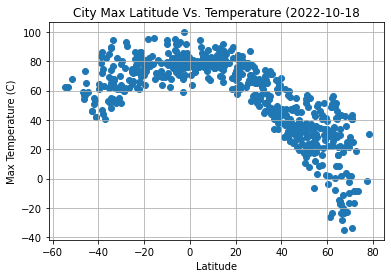

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude Vs. Temperature (2022-10-18")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig01.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

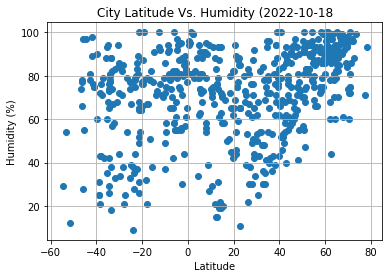

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity (2022-10-18")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig02.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

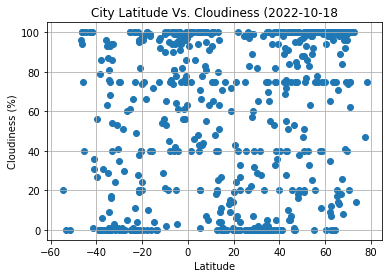

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (2022-10-18")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig03.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

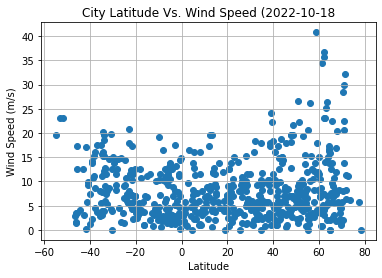

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed (2022-10-18")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig04.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
x_values= city_data_df['Lat']
y_maxTemp = city_data_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_maxTemp)

regress_values = x_values * slope + intercept
print(regress_values)

City_ID
0      12.491838
1     -14.278332
2       4.028009
3     -15.529189
4      32.679030
         ...    
574    26.497787
575    15.632677
576    55.221850
577    56.427056
578    48.054530
Name: Max Temp, Length: 579, dtype: float64


In [13]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.91x +69.67


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >= 0)]
x_values_n= northern_hemi_df['Lat']

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,champerico,14.3000,-91.9167,91.94,72,11,4.03,GT,1668533399
4,kodiak,57.7900,-152.4072,40.51,75,40,5.75,US,1668533249
5,kesinga,20.2000,83.2333,61.79,65,0,2.53,IN,1668533401
6,yellowknife,62.4560,-114.3525,25.32,86,100,23.02,CA,1668533244
8,thompson,55.7435,-97.8558,3.36,85,20,2.30,CA,1668533402


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"] < 0)]
x_values_s= southern_hemi_df['Lat']
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,62.62,54,0,23.02,CL,1668533358
2,carnarvon,-24.8667,113.6333,71.89,67,0,14.34,AU,1668533400
3,santiago del estero,-27.7951,-64.2615,93.31,21,30,14.56,AR,1668533400
7,kaitangata,-46.2817,169.8464,56.82,77,100,1.70,NZ,1668533402
11,coquimbo,-29.9533,-71.3436,64.13,72,75,14.97,CL,1668533130


###  Temperature vs. Latitude Linear Regression Plot

In [16]:
# Linear regression on Northern Hemisphere
y_maxTemp_n = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_n, y_maxTemp_n, )

regress_values_n = x_values_n * slope + intercept
print(regress_values_n)

City_ID
1      75.960199
4      26.242614
5      69.215344
6      20.908463
8      28.582165
         ...    
573    75.510122
574    44.258922
576    26.352933
577    34.323408
578    33.224340
Name: Lat, Length: 381, dtype: float64


In [17]:
line_eq_01= "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_01)

y = -1.14x +92.31


The r-value is: 0.7125508365745045


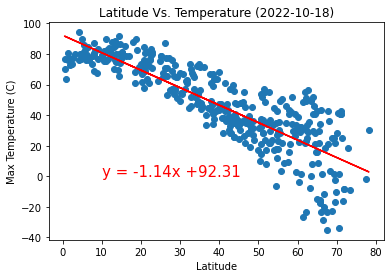

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o")
plt.plot(x_values_n,regress_values_n,"r-")

# Incorporate the other graph properties
plt.title("Latitude Vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.annotate(line_eq_01,(10,0),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")


# Save the figure
plt.savefig("../output_data/Fig01a.png")

# Show plot
plt.show()

In [19]:
# Linear regression on Southern Hemisphere
y_maxTemp_s = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress( x_values_s, y_maxTemp_s)

regress_values_s = x_values_s * slope + intercept
print(regress_values_s)

City_ID
0      57.755858
2      71.023726
3      69.649996
7      60.977819
11     68.637571
         ...    
564    71.757502
566    66.512521
567    72.537250
572    67.071085
575    61.819677
Name: Lat, Length: 198, dtype: float64


In [20]:
line_eq_02 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_02)

y = 0.47x +82.69


The r-value is: 0.3126625736637993


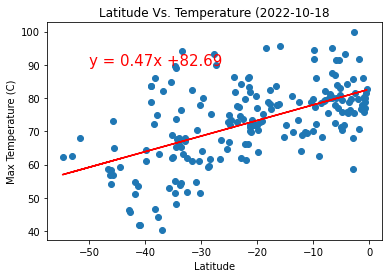

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o")
plt.plot(x_values_s,regress_values_s, "r-")
plt.annotate(line_eq_02,(-50,90),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Latitude Vs. Temperature (2022-10-18")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")


print(f"The r-value is: {rvalue**2}")


# Save the figure
plt.savefig("../output_data/Fig01b.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Temperature Vs. Latitude

In the northern hemisphere, there is a negative trending correlation to the change in temperature. A strong majority of the cities are close to the regression line demonstrating a strong correlation.
In the southern hemisphere, there is a positive correlation to the change in temperature. Though a decent amount of cities are near the regression line, a majority do not have a strong correlation.

### Humidity vs. Latitude Linear Regression Plot

In [22]:
# Northern Hemisphere
y_humidity_n=northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress( x_values_n, y_humidity_n,)

regress_values_n_h = x_values_n * slope + intercept
print(regress_values_n_h)

City_ID
1      65.016345
4      80.501424
5      67.117103
6      82.162803
8      79.772745
         ...    
573    65.156527
574    74.890050
576    80.467064
577    77.984573
578    78.326890
Name: Lat, Length: 381, dtype: float64


In [23]:
line_eq_03 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_03)

y = 0.36x +59.92


The r-value is: 0.1336944247158035


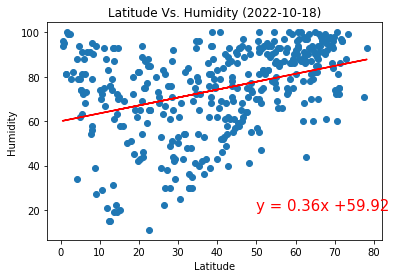

In [24]:
# Build scatter plot for latitude vs. humidity
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o")
plt.plot(x_values_n,regress_values_n_h,"r-")

# Incorporate the other graph properties
plt.title("Latitude Vs. Humidity (2022-10-18)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.annotate(line_eq_03,(50,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")


# Save the figure
plt.savefig("../output_data/Fig02a.png")

# Show plot
plt.show()

In [25]:
# Southern Hemisphere
y_humidity_s=southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_s, y_humidity_s)


regress_values_s_h = x_values_s * slope + intercept
print(regress_values_s_h)

City_ID
0      56.581014
2      66.098237
3      65.112841
7      58.892170
11     64.386615
         ...    
564    66.624584
566    62.862287
567    67.183908
572    63.262953
575    59.496047
Name: Lat, Length: 198, dtype: float64


In [26]:
line_eq_04 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_04)

y = 0.34x +74.47


The r-value is: 0.07468807365545233


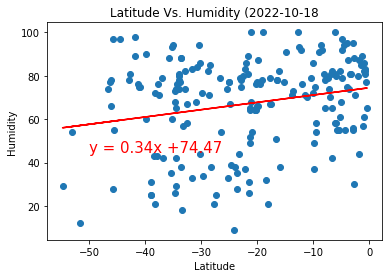

In [41]:
# Build scatter plot for latitude vs. humidity
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o")
plt.plot(x_values_s,regress_values_s_h,"r-")

# Incorporate the other graph properties
plt.title("Latitude Vs. Humidity (2022-10-18")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.annotate(line_eq_04,(-50,45),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")


# Save the figure
plt.savefig("../output_data/Fig02b.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Humidity Vs. Latitude

In the northern hemisphere, there is a positive correlation to the change in humidity. According to the chart, a strong number of cities are near the regression line and have similar upward trend; so a good correlation.
In the southern hemisphere, there is a positive correlation to the change in humidity. In contrast, measurements so that cities seem very spread out on the chart; very few cities fall on or near to the regression line, but all the cities seem to have the same positive trend.

### Cloudiness vs. Latitude Linear Regression Plot

In [28]:
# Northern Hemisphere
y_cloudiness_n=northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_n, y_cloudiness_n)

regress_values_n_c = x_values_n * slope + intercept
print(regress_values_n_c)


City_ID
1      45.361603
4      69.552390
5      48.643407
6      72.147797
8      68.414050
         ...    
573    45.580594
574    60.786303
576    69.498713
577    65.620567
578    66.155334
Name: Lat, Length: 381, dtype: float64


In [29]:
line_eq_05 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_05)

y = 0.56x +37.41


The r-value is: 0.07468807365545233


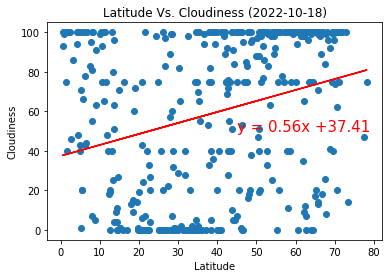

In [43]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o")
plt.plot(x_values_n,regress_values_n_c,"r-")

# Incorporate the other graph properties
plt.title("Latitude Vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.annotate(line_eq_05,(45,50),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")


# Save the figure
plt.savefig("../output_data/Fig03a.png")

# Show plot
plt.show()

In [31]:
# Southern Hemisphere
y_cloudiness_s=southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_s, y_cloudiness_s)

regress_values_s_c = x_values_s * slope + intercept
print(regress_values_s_c)

City_ID
0      25.480558
2      51.177778
3      48.517136
7      31.720856
11     46.556271
         ...    
564    52.598956
566    42.440471
567    54.109173
572    43.522299
575    33.351367
Name: Lat, Length: 198, dtype: float64


In [32]:
line_eq_06 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_06)

y = 0.91x +73.77


The r-value is: 0.07468807365545233


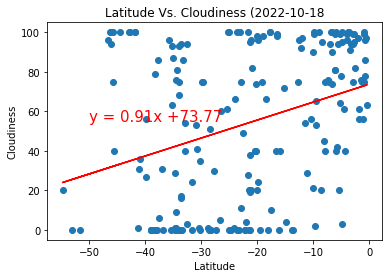

In [46]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o")
plt.plot(x_values_s,regress_values_s_c,"r-")

# Incorporate the other graph properties
plt.title("Latitude Vs. Cloudiness (2022-10-18")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.annotate(line_eq_06,(-50,55),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")


# Save the figure
plt.savefig("../output_data/Fig03b.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Cloudiness Vs. Latitude

In the northern hemisphere, there is a positive correlation to the change in cloudiness.
In the southern hemisphere, there is a positive correlation to the change in cloudiness.
Cities in both hemispheres do not show very strong correlation to the trending line, demonstrating very little effect of change in latitude to cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

In [34]:
# Northern Hemisphere
y_windSpeed_n=northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_n, y_windSpeed_n)

regress_values_n_w = x_values_n * slope + intercept
print(regress_values_n_w)

City_ID
1      6.570032
4      9.579534
5      6.978311
6      9.902421
8      9.437917
         ...   
573    6.597276
574    8.488972
576    9.572857
577    9.090388
578    9.156917
Name: Lat, Length: 381, dtype: float64


In [35]:
line_eq_07 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_07)

y = 0.07x +5.58


The r-value is: 0.07468807365545233


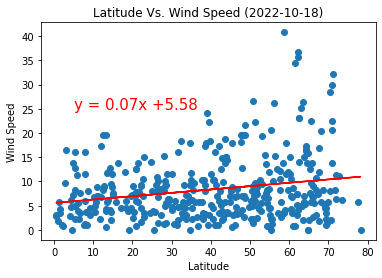

In [47]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o")
plt.plot(x_values_n,regress_values_n_w,"r-")

# Incorporate the other graph properties
plt.title("Latitude Vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.annotate(line_eq_07,(5,25),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")


# Save the figure
plt.savefig("../output_data/Fig04a.png")

# Show plot
plt.show()

In [37]:
# Southern Hemisphere
y_windSpeed_s=southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_s, y_windSpeed_s)

regress_values_s_w = x_values_s * slope + intercept
print(regress_values_s_w)

City_ID
0      11.477412
2       8.489660
3       8.799006
7      10.751868
11      9.026991
         ...    
564     8.324423
566     9.505525
567     8.148834
572     9.379743
575    10.562293
Name: Lat, Length: 198, dtype: float64


In [38]:
line_eq_08 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_08)

y = -0.11x +5.86


The r-value is: 0.07468807365545233


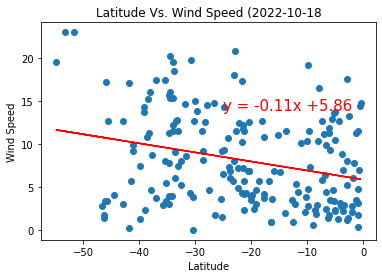

In [52]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o")
plt.plot(x_values_s,regress_values_s_w,"r-")

# Incorporate the other graph properties
plt.title("Latitude Vs. Wind Speed (2022-10-18")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.annotate(line_eq_08,(-25,14),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")


# Save the figure
plt.savefig("../output_data/Fig04b.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Wind Speed Vs. Latitude

In the northern hemisphere, there is a slight positive correlation to the change in wind speed. Overall, quite a number of cities a very close to that trending line so a strong correlation.
In the southern hemisphere, there is a negative correlation to the change in wind speed. In this hemisphere, very few cities fall along the decending trend.